<a href="https://colab.research.google.com/github/eric157/Machine-Learners/blob/main/MLtask_T5_MachineLearners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mutual fund Data Regression Task**

Importing Libraries

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import warnings
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/2024 18057 - Mutual_fund Data - 2024 18057 - Mutual_fund Data.csv')

In [3]:
df

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51%,28.32,37.79%,20.29%,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25%,24.89,46.08%,21.93%,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94%,35.11,54.46%,27.48%,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37%,21.40,59.79%,0,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06%,23.69,32.07%,15.18%,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,lic mutual fund,LIC MF Multi Cap Reg-G,0,0,4.56%,17.43,48.89%,0,Rs.1000.0,Yogesh Patil,1369.6 cr,Equity,Very High
1389,lic mutual fund,LIC MF Large Cap-G,2,3,4.85%,57.66,31.34%,13.48%,Rs.1000.0,Yogesh Patil,1576.3 cr,Equity,Very High
1390,lic mutual fund,LIC MF Large & Mid Cap Reg-G,2,2,4.98%,40.39,48.16%,19.01%,Rs.1000.0,Yogesh Patil,3220.66 cr,Equity,High
1391,lic mutual fund,LIC MF Infrastructure-G,3,4,2.92%,51.91,76.07%,33.55%,Rs.1000.0,Yogesh Patil,725.1 cr,Equity,Very High


In [4]:
df.describe()

,Morning star rating,Value Research rating,NAV
count,1393.000000,1393.000000,1393.000000
mean,1.666906,1.669060,321.144436
std,1.792674,1.730066,856.937370
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,15.260000
50%,1.000000,1.000000,28.890000
75%,3.000000,3.000000,101.320000
max,5.000000,5.000000,6706.890000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMC                    1393 non-null   object 
 1   Fund Name              1393 non-null   object 
 2   Morning star rating    1393 non-null   int64  
 3   Value Research rating  1393 non-null   int64  
 4   1 month return         1393 non-null   object 
 5   NAV                    1393 non-null   float64
 6   1 Year return          1393 non-null   object 
 7   3 Year Return          1393 non-null   object 
 8   Minimum investment     1393 non-null   object 
 9   Fund Manager           1354 non-null   object 
 10  AUM                    1393 non-null   object 
 11  Category               1393 non-null   object 
 12  Risk                   1393 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 141.6+ KB


cleaning '%' from columns 1 Year return , 3 year return and 1 month return

In [6]:
def clean_percentage(col):
    return col.fillna('').astype(str).str.rstrip('%').replace('', '0').astype(float)

def clean_currency(col):
    return col.astype(str).str.replace(r'[Rs.,cr]', '', regex=True).replace('', '0').astype(float)

In [7]:
df['1 Year return'] = clean_percentage(df['1 Year return'])
df['3 Year Return'] = clean_percentage(df['3 Year Return'])
df['1 month return'] = clean_percentage(df['1 month return'])

cleaning minmum investment and AUM for Rs and Cr

In [8]:
df['Minimum investment'] = clean_currency(df['Minimum investment'])

In [9]:
def clean_crore(col):
    col = col.fillna('').astype(str)
    col = col.str.replace(r'cr', '', regex=True).replace('', '0')
    return pd.to_numeric(col, errors='coerce') * 10**7
df['AUM'] = clean_crore(df['AUM'])

In [10]:
df.head()

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51,28.32,37.79,20.29,5000.0,Abhinav Khandelwal,2.569630e+10,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25,24.89,46.08,21.93,5000.0,Abhinav Khandelwal,3.222600e+09,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94,35.11,54.46,27.48,5000.0,Abhinav Khandelwal,3.292760e+10,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37,21.40,59.79,0.00,5000.0,Abhinav Khandelwal,5.278700e+10,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06,23.69,32.07,15.18,5000.0,Abhinav Khandelwal,5.777200e+09,Equity,Very High


dropping unecessery columns

In [11]:
columns_to_drop = ['Fund Manager','Fund Name']
df = df.drop(columns=columns_to_drop)
df.head()

,AMC,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,AUM,Category,Risk
0,mahindra manulife mutual fund,3,3,5.51,28.32,37.79,20.29,5000.0,2.569630e+10,Equity,High
1,mahindra manulife mutual fund,0,3,7.25,24.89,46.08,21.93,5000.0,3.222600e+09,Equity,High
2,mahindra manulife mutual fund,4,4,5.94,35.11,54.46,27.48,5000.0,3.292760e+10,Equity,High
3,mahindra manulife mutual fund,0,0,8.37,21.40,59.79,0.00,5000.0,5.278700e+10,Equity,Very High
4,mahindra manulife mutual fund,4,3,4.06,23.69,32.07,15.18,5000.0,5.777200e+09,Equity,Very High


In [12]:
df['Risk'].value_counts()

,count
Risk,
Very High,545
Moderate,327
Low to Moderate,165
High,154
Moderately High,102
Low,94
Low toModerate,5
Risk Level,1


oridinal encoding of risk

In [13]:
risk_mapping = {
    'Very High': 5,
    'High': 4,
    'Moderately High': 3,
    'Moderate': 2,
    'Low to Moderate': 1,
    'Low': 0,
    'Low toModerate': 1,
    'Risk Level': 0
}

df['Risk_Ordinal'] = df['Risk'].map(risk_mapping)

In [14]:
df

,AMC,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,AUM,Category,Risk,Risk_Ordinal
0,mahindra manulife mutual fund,3,3,5.51,28.32,37.79,20.29,5000.0,2.569630e+10,Equity,High,4
1,mahindra manulife mutual fund,0,3,7.25,24.89,46.08,21.93,5000.0,3.222600e+09,Equity,High,4
2,mahindra manulife mutual fund,4,4,5.94,35.11,54.46,27.48,5000.0,3.292760e+10,Equity,High,4
3,mahindra manulife mutual fund,0,0,8.37,21.40,59.79,0.00,5000.0,5.278700e+10,Equity,Very High,5
4,mahindra manulife mutual fund,4,3,4.06,23.69,32.07,15.18,5000.0,5.777200e+09,Equity,Very High,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1388,lic mutual fund,0,0,4.56,17.43,48.89,0.00,10000.0,1.369600e+10,Equity,Very High,5
1389,lic mutual fund,2,3,4.85,57.66,31.34,13.48,10000.0,1.576300e+10,Equity,Very High,5
1390,lic mutual fund,2,2,4.98,40.39,48.16,19.01,10000.0,3.220660e+10,Equity,High,4
1391,lic mutual fund,3,4,2.92,51.91,76.07,33.55,10000.0,7.251000e+09,Equity,Very High,5


In [15]:
columns_to_drop = ['Risk']
df = df.drop(columns=columns_to_drop)
df.head()

,AMC,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,AUM,Category,Risk_Ordinal
0,mahindra manulife mutual fund,3,3,5.51,28.32,37.79,20.29,5000.0,2.569630e+10,Equity,4
1,mahindra manulife mutual fund,0,3,7.25,24.89,46.08,21.93,5000.0,3.222600e+09,Equity,4
2,mahindra manulife mutual fund,4,4,5.94,35.11,54.46,27.48,5000.0,3.292760e+10,Equity,4
3,mahindra manulife mutual fund,0,0,8.37,21.40,59.79,0.00,5000.0,5.278700e+10,Equity,5
4,mahindra manulife mutual fund,4,3,4.06,23.69,32.07,15.18,5000.0,5.777200e+09,Equity,5


In [16]:
df['Category'].value_counts()

,count
Category,
Equity,457
Other,388
Debt,383
Hybrid,165


one hot encoding of Category column

In [17]:
df = pd.get_dummies(df, columns=['Category'], prefix=['Category'])
df.head()

,AMC,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,AUM,Risk_Ordinal,Category_Debt,Category_Equity,Category_Hybrid,Category_Other
0,mahindra manulife mutual fund,3,3,5.51,28.32,37.79,20.29,5000.0,2.569630e+10,4,False,True,False,False
1,mahindra manulife mutual fund,0,3,7.25,24.89,46.08,21.93,5000.0,3.222600e+09,4,False,True,False,False
2,mahindra manulife mutual fund,4,4,5.94,35.11,54.46,27.48,5000.0,3.292760e+10,4,False,True,False,False
3,mahindra manulife mutual fund,0,0,8.37,21.40,59.79,0.00,5000.0,5.278700e+10,5,False,True,False,False
4,mahindra manulife mutual fund,4,3,4.06,23.69,32.07,15.18,5000.0,5.777200e+09,5,False,True,False,False


Lable Encoding of AMC

In [20]:
label_encoder = LabelEncoder()
df['AMC_Encoded'] = label_encoder.fit_transform(df['AMC'])
df = df.drop('AMC', axis=1)
df

,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,AUM,Risk_Ordinal,Category_Debt,Category_Equity,Category_Hybrid,Category_Other,AMC_Encoded
0,3,3,5.51,28.32,37.79,20.29,5000.0,2.569630e+10,4,False,True,False,False,18
1,0,3,7.25,24.89,46.08,21.93,5000.0,3.222600e+09,4,False,True,False,False,18
2,4,4,5.94,35.11,54.46,27.48,5000.0,3.292760e+10,4,False,True,False,False,18
3,0,0,8.37,21.40,59.79,0.00,5000.0,5.278700e+10,5,False,True,False,False,18
4,4,3,4.06,23.69,32.07,15.18,5000.0,5.777200e+09,5,False,True,False,False,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,0,0,4.56,17.43,48.89,0.00,10000.0,1.369600e+10,5,False,True,False,False,17
1389,2,3,4.85,57.66,31.34,13.48,10000.0,1.576300e+10,5,False,True,False,False,17
1390,2,2,4.98,40.39,48.16,19.01,10000.0,3.220660e+10,4,False,True,False,False,17
1391,3,4,2.92,51.91,76.07,33.55,10000.0,7.251000e+09,5,False,True,False,False,17


Bool to Integer

In [21]:
df['Category_Debt'] = df['Category_Debt'].astype(int)
df['Category_Equity'] = df['Category_Equity'].astype(int)
df['Category_Hybrid'] = df['Category_Hybrid'].astype(int)
df['Category_Other'] = df['Category_Other'].astype(int)

filled NAN in AUM with median

In [22]:
df['AUM'] = df['AUM'].fillna(df['AUM'].median())

correlation matrix

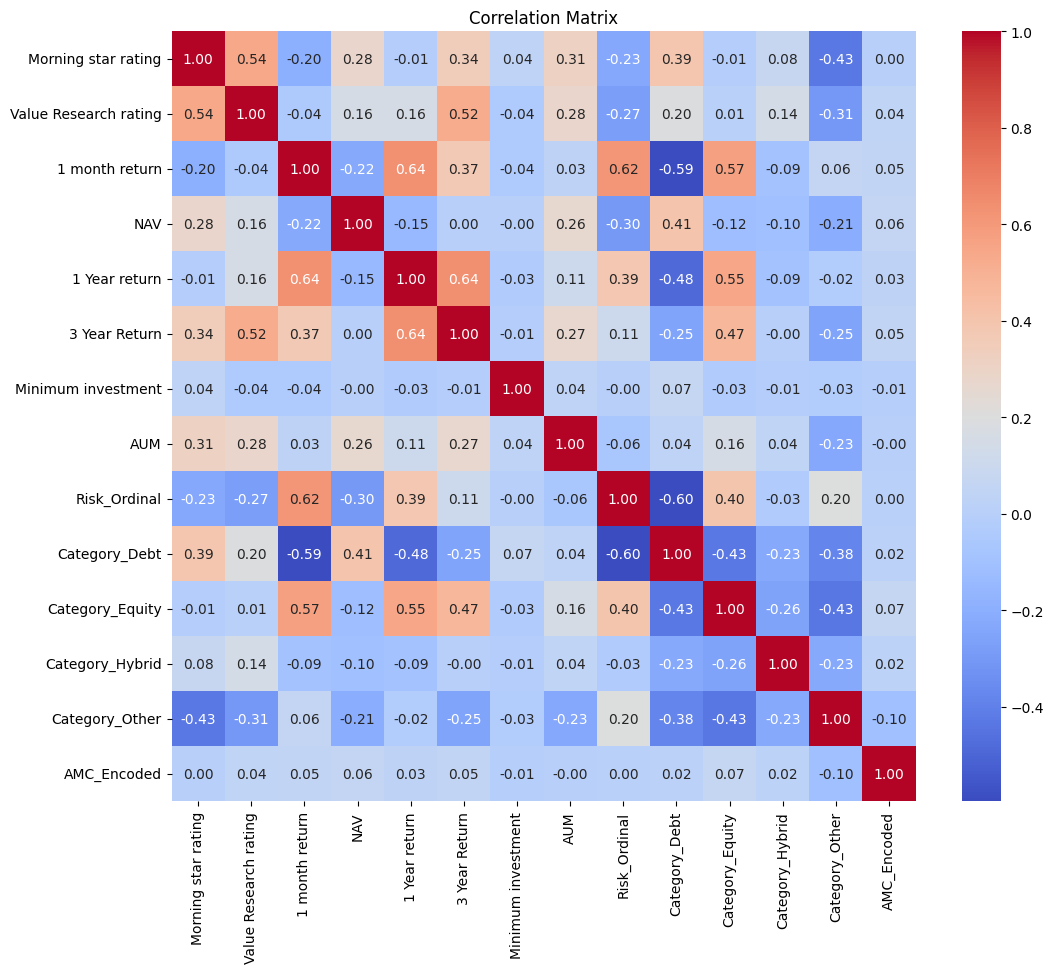

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

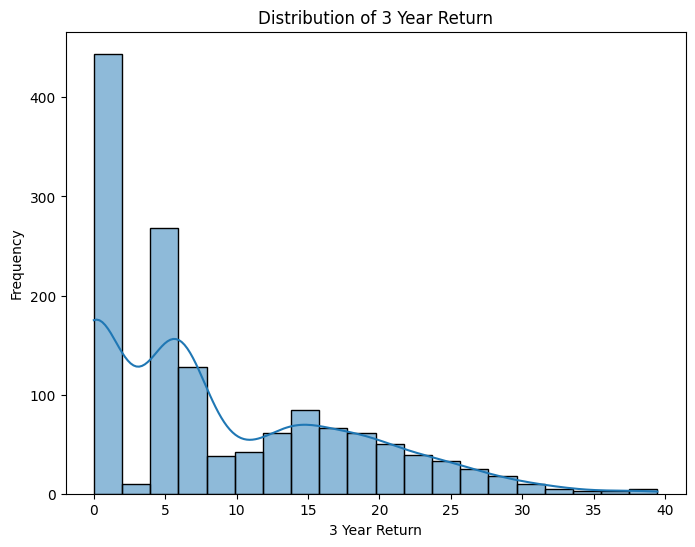

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['3 Year Return'], bins=20, kde=True)
plt.title('Distribution of 3 Year Return')
plt.xlabel('3 Year Return')
plt.ylabel('Frequency')
plt.show()

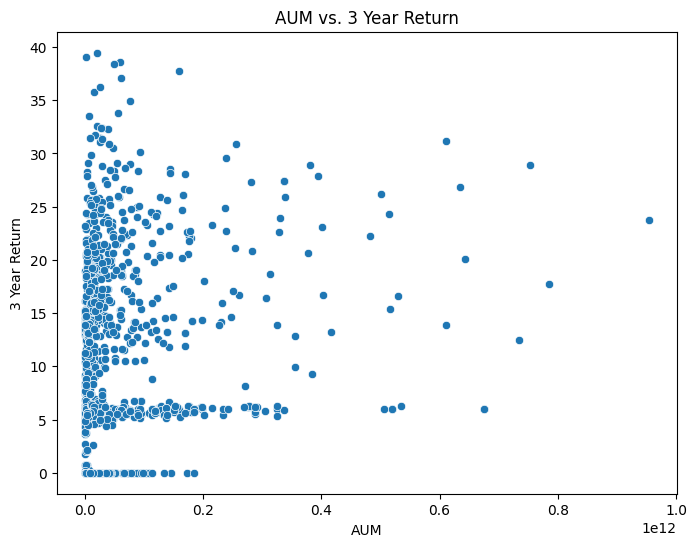

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AUM', y='3 Year Return', data=df)
plt.title('AUM vs. 3 Year Return')
plt.xlabel('AUM')
plt.ylabel('3 Year Return')
plt.show()

droping target column and splting data

In [23]:
X = df.drop(columns=['3 Year Return'])
y = df['3 Year Return']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

applying diffenent regression models

In [30]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr)}")

Linear Regression Results:
Mean Squared Error: 25.277471828915697
R-squared: 0.6805884708640679
Mean Absolute Error: 3.703461982303354


In [42]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")
print(f"Mean Absolute Error: {mae_lasso}")

Lasso Regression Results:
Mean Squared Error: 29.553031504051365
R-squared: 0.6265615862535276
Mean Absolute Error: 3.8553853849414925


In [41]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Ridge Regression Results:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")

Ridge Regression Results:
Mean Squared Error: 25.277795891836373
R-squared: 0.6805843759358359
Mean Absolute Error: 3.7032700617848024


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.85487e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [25]:
gb = GradientBoostingRegressor(random_state=42)

In [43]:
paramgrid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [45]:
grid_gb = GridSearchCV(gb, paramgrid_gb, cv=5)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Results:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")
print(f"Best Parameters: {grid_gb.best_params_}")

Gradient Boosting Regression Results:
Mean Absolute Error: 1.603906257596614
Mean Squared Error: 7.090361211269286
R-squared: 0.9104046824007569
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


Got best Result on gradient Boosting Regression